# Test exampple Charbeneau (2003) Fig 4.4.3

This is probably the easiest way to compare the class with US soils with that of Dutch soils: recreating figg 4.4.3 in the book of of Charbeneau (2000, p198)

In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
import etc

sys.path.insert(0, os.getcwd())  # is line in .vscode/settings.json {"jupyter.notebookFileRoot": "${workspaceFolder}"}
from src import NL_soils as sNL
from src import US_soils as sUS


print(os.getcwd())

/Users/Theo/GRWMODELS/python/tools/Stromingen/Munsflow_H2O_1995


In [2]:
# Check the working directory the project is working from (using expected name)

root = os.getcwd()
expected = "Munsflow_H2O_1995"
if not root.endswith(expected):
    raise RuntimeError(f"Unexpected project root: {root}")
dirs = etc.Dirs(root)

In [3]:
# Get the data of the parameters of the Dutch Soils form Excel workbook and instantiate class

wbook_NL = os.path.join(dirs.data, 'NL_VG_soilprops.xlsx')
sNL.Soil.load_soils(wbook_NL) # load once
sNL.Soil.pretty_data()
sand_NL = sNL.Soil("O01")


     Hoofdsoort                                     Omschrijving  theta_r  theta_s   alpha      n  lambda      Ks                 Leem   Lutum      os       M50   N1  N2
code                                                                                                                                                                     
B01        Zand           leemarm, zeer fijn tot matig fijn zand     0.02    0.427  0.0217  1.735   0.981   31.23                 0-10     NaN    0-15   105-210   32   7
B02        Zand        zwak lemig, zeer fijn tot matig fijn zand     0.02    0.434  0.0216  1.349   7.202   83.24                10-18     NaN    0-15   105-210   27  11
B03        Zand       sterk lemig, zeer fijn tot matig fijn zand     0.02    0.443  0.0150  1.505   0.139   19.08                18-33     NaN    0-15   105-210   14   4
B04        Zand  zeer sterk lemig, zeer fijn tot matig fijn zand     0.02    0.462  0.0149  1.397   0.295   34.88                33-50     NaN    0-15

In [4]:
# Get the data of the parameters of the US soils form Excel workbook and instantiate class

wbook_US = os.path.join(dirs.data, 'US_BC_soilprops.xlsx')
sUS.Soil.load_soils(wbook_US) # load once
sUS.Soil.pretty_data()
sand_US = sUS.Soil("US09")


     Main cat     Soil Texture      Ks  sigma_Ks  theta_s  sigma_theta_s  theta_r  sigma_theta_r  psi_b  sigma_psi_b  lambda  sigma_lambda
code                                                                                                                                      
US01     Clay             Clay    4.80      10.0     0.38           0.09    0.068          0.034  125.0        188.0    0.09          0.09
US02     Loam        Clay loam    6.20      17.0     0.41           0.09    0.095          0.010   53.0         42.0    0.31          0.09
US03     Loam             Loam   25.00      44.0     0.43           0.10    0.078          0.013   28.0         16.0    0.56          0.11
US04     Sand       Loamy sand  350.00     270.0     0.41           0.09    0.057          0.015    8.1          2.8    1.28          0.27
US05     Silt             Silt    6.00       7.9     0.46           0.11    0.034          0.010   62.0         27.0    0.37          0.05
US06     Loam       Silty l

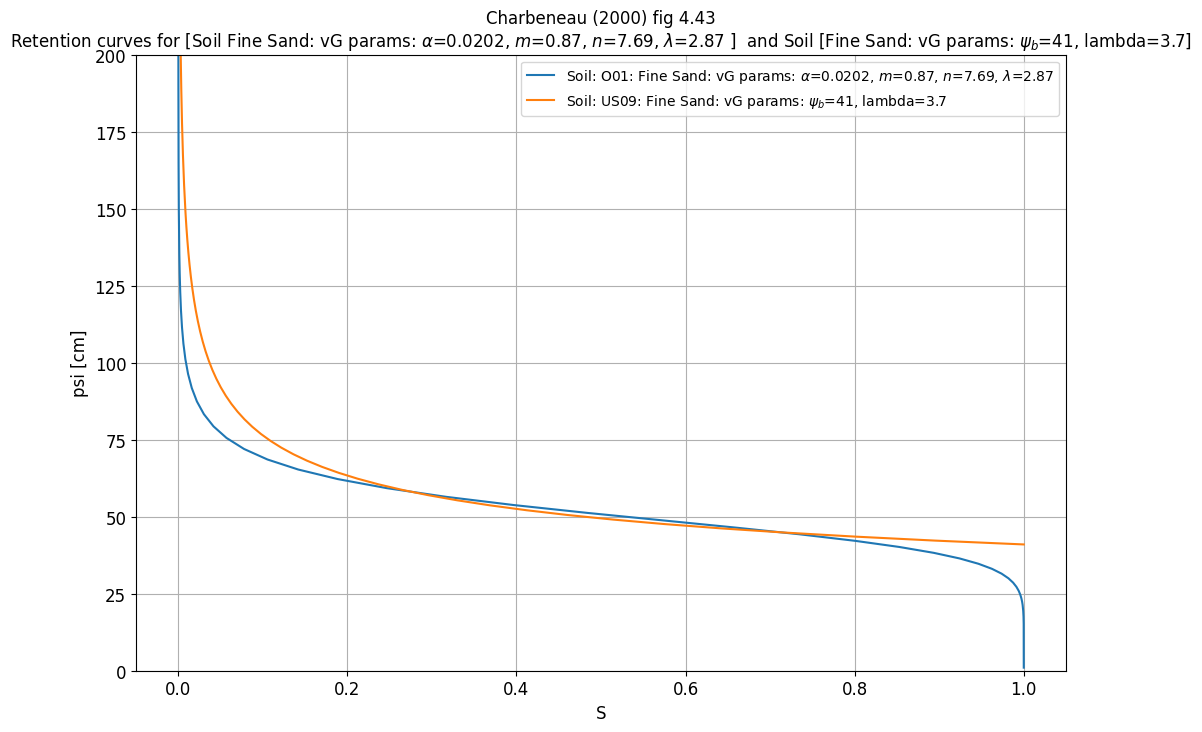

In [14]:
# Charbeneau (2000) fig 4.4.1, showing BC and vG for fine sand data.

# Seek similar soil_US
soil_NL = sNL.Soil('O01')
soil_US = sUS.Soil('US09')

# Change soil paramter values to match those used for fig 4.4.3 in Charbeneau (2000)
soil_NL.props['alpha'], soil_NL.props['m'], soil_NL.props['n'] = 0.0202, 0.87, 1 / (1 - 0.87)
soil_US.props['psi_b'], soil_US.props['lambda'] = 41, 3.7

# Soil names, are invalid because parameters are changed next, so Dont use
np = soil_NL.props
up = soil_US.props

nl_soil_nm  = fr'Fine Sand: vG params: $\alpha$={np['alpha']:.3g}, $m$={np['m']:.3g}, $n$={np['n']:.3g}, $\lambda$={np['lambda']:.3g}'
us_soil_nm  = fr'Fine Sand: vG params: $\psi_b$={up['psi_b']:.3g}, lambda={up['lambda']:.3g}'

# Number of points
N = 200

# Choose a proper psi range for each of the two soil
psi_NL = soil_NL.psispace(N)
psi_US = soil_US.psispace(N)

ttl = "Charbeneau (2000) fig 4.43\n"
title = ttl + f"Retention curves for [Soil {nl_soil_nm} ]  and Soil [{us_soil_nm}]"
ax = etc.newfig(title, 'S', 'psi [cm]', ylim=(0, 200))

ax.plot(soil_NL.S_fr_psi(psi_NL), psi_NL, label=f'Soil: {soil_NL.code}: {nl_soil_nm}')
ax.plot(soil_US.S_fr_psi(psi_US), psi_US, label=f'Soil: {soil_US.code}: {us_soil_nm}')

ax.legend()

In [ ]:
psi = np.logspace(0, 200)[1:]
S = np.linspace(0, 1.)

psi_US = sand_US.psi_fr_S(psi)
psi_NL = sand_NL.psi_fr_S(psi)

title = 'Compare graphs for sand modelled by BC and vG parameters (Charbneau 2000, fig 4.41)'
ax = etc.newfig(title, r'$S(\psi)$', r'$\psi$', yscale='linear')

ax.plot(S, psi_US, label='sand_us')
ax.plot(S, psi_NL, label='sand_nl')

ax.legend()